In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from caits.properties import rolling_zcr
from caits.visualization import plot_signal
from utils import load_wav_instance, load_csv_instance

# Audio - uni-axis

In [3]:
audio = load_wav_instance(path="data/yes.wav", return_vector=True)
print(audio.keys())

1
dict_keys(['signal', 'params', 'channels', 'sr', 'shape'])


In [4]:
print(audio["shape"])
print(audio["sr"])

(16000,)
16000


In [5]:
zcr = rolling_zcr(audio["signal"], 300, 150)

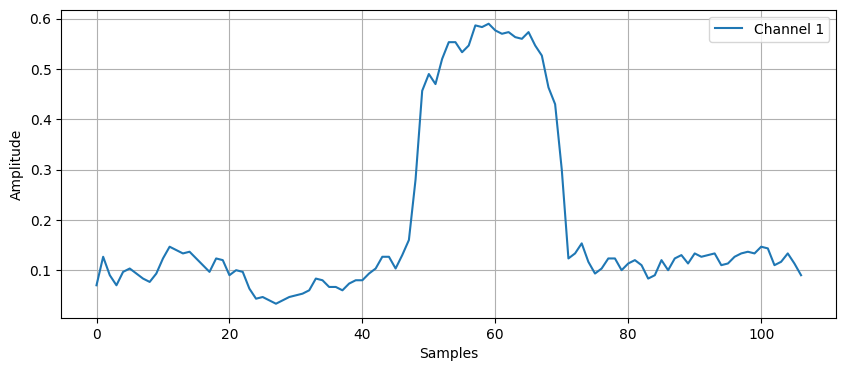

In [6]:
plot_signal(zcr, return_mode=False)

# Motion - multi-axis

In [7]:
motion = load_csv_instance("data/scratching_eye.csv")

In [8]:
motion.keys()

dict_keys(['signal', 'shape', 'channels'])

In [9]:
print(motion["channels"])
print(motion["shape"])
print(type(motion["signal"]))


['acc_x_axis_g', 'acc_y_axis_g', 'acc_z_axis_g', 'gyr_x_axis_deg/s', 'gyr_y_axis_deg/s', 'gyr_z_axis_deg/s']
(1034, 6)
<class 'numpy.ndarray'>


In [10]:
dict_zcr = {}
for i in range(len(motion["channels"])):
    dict_zcr[motion["channels"][i]] = rolling_zcr(motion["signal"][:, i], 100, 50)

dict_zcr.keys()

dict_keys(['acc_x_axis_g', 'acc_y_axis_g', 'acc_z_axis_g', 'gyr_x_axis_deg/s', 'gyr_y_axis_deg/s', 'gyr_z_axis_deg/s'])

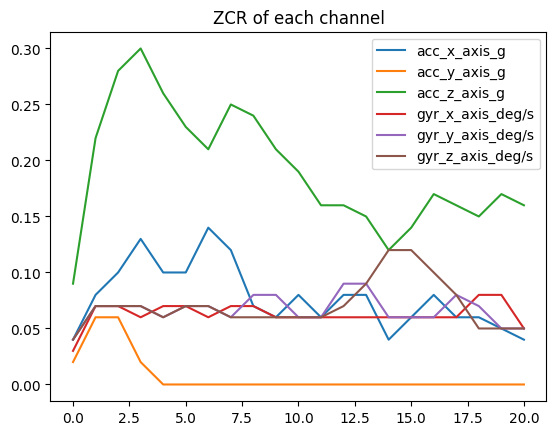

In [11]:
for key, values in dict_zcr.items():
    plt.plot(values, label=key)

plt.title("ZCR of each channel")
plt.legend()